# Classifying Data with Logistic Regression in Python

## Learning Objectives
Logistic Regression is one of the simplest and most commonly used classification approaches in machine learning. Logistic regression allows us to model the relationship between independent variables and the probability of a categorical response (such as True or False, Yes or No). By the end of this tutorial, you will have learned:

+ How to import, explore and prepare data
+ How to build a Logistic Regression model
+ How to evaluate a Logistic Regression model
+ How to interpret the coefficients of a Logistic Regression model 

## 1. Collect the Data

Before we import our data, we must first import the `pandas` package.

In [1]:
import pandas as pd

Now, we can import our data into a dataframe called `loan`.

In [2]:
loan = pd.read_csv("loan.csv")

To verify that the import worked as expected, let’s use the `head()` method of the pandas dataframe to preview the data.

In [3]:
loan.head()

,Income,Loan Amount,Default
0,30,8,No
1,22,10,No
2,33,12,No
3,28,20,No
4,23,32,No


Our dataset has three columns. The first two - `Income` and `Loan Amount` - are the predictors (or independent variables), while the last one - `Default` - is the response (or dependent variable).

In this exercise, we’ll use this `loan` data to train a logistic regression model to predict whether a borrower will default or not default on a new loan based on their income and the amount of money they intend to borrow. 

## 2. Explore the Data

Now that we have our data, let's try to understand it.

First, let's get a concise summary of the structure of the data by calling the `info()` method of the `loan` dataframe.

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes


By looking at the `RangeIndex` value from the summary, we can tell that there are 30 instances (or rows) in the dataset. 

The `Data columns` value shows that the dataset consists of 3 features (or columns). Looking at the `Dtype` column within this section, we see that the `Income` and `Loan Amount` columns hold integer values, while the `Default` column holds text (aka object).

Next, let's get summary statistics for the numeric features in the data by calling the `describe()` method of the dataframe.

In [5]:
loan.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,20.966667,54.233333
std,6.195011,28.231412
min,12.000000,8.000000
25%,16.250000,32.000000
50%,20.500000,54.500000
75%,24.750000,71.750000
max,34.000000,110.000000


From the statistics, we can see the average, standard deviation, minimum, and maximum values for both the `Income` and `Loan Amount` variables. We also get the 25th, 50th and 75th percentile values for both variables.

Note that the values are in the thousands, so the minimum and maximum income values are \\$12,000 and \\$34,000, respectively. 

Now that we've described our data structurally and numerically, let’s describe it visually as well.

### Boxplot
Before we create the plots we need, we must first import a couple of packages. The first is the `matplotlib` package and the second is the `seaborn` package.

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

Let's start by creating a boxplot that highlights the difference in annual income between those that did not default on their loan (No) and those that did default (Yes). 

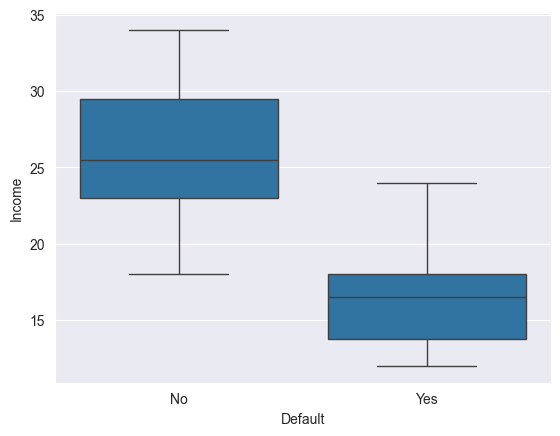

In [8]:
ax = sns.boxplot(data=loan, x='Default', y='Income')

The chart shows that those that did not default on their loans tend to have a higher annual income than those that did default on their loans. 

Next, let's create another box plot to highlight the difference in amount borrowed between those that did not default on their loans and those that did.

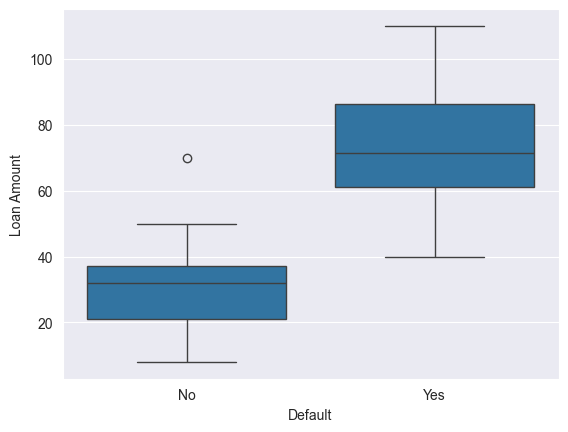

In [9]:
ax = sns.boxplot(data=loan, x='Default', y='Loan Amount')

This chart shows that those that defaulted on their loans tend to have borrowed more money than those that did not default.

### Scatterplot
If we recode the `Default` feature values 'No' and 'Yes' to '0' and '1', we can also use a scatterplot to get a slightly different perspective of our data. 

However, before we do so, we must first import the `numpy` package.

In [10]:
import numpy as np

Now, we can create a scatterplot that describes the relationship between the annual income of borrowers and loan outcomes. 

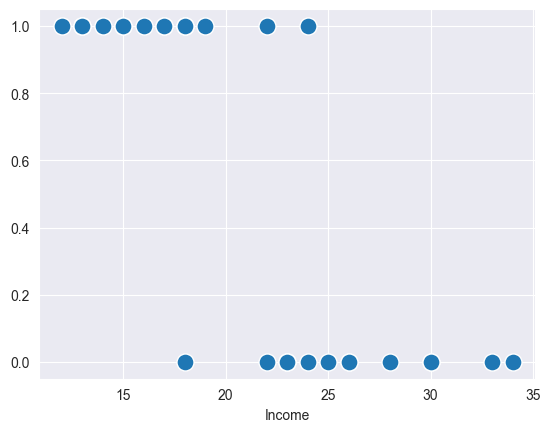

In [11]:
ax = sns.scatterplot(x=loan['Income'],
                     y=np.where(loan['Default'] == 'No', 0, 1),
                     s=150)

We can also describe the relationship between the amount borrowed and loan outcomes. 

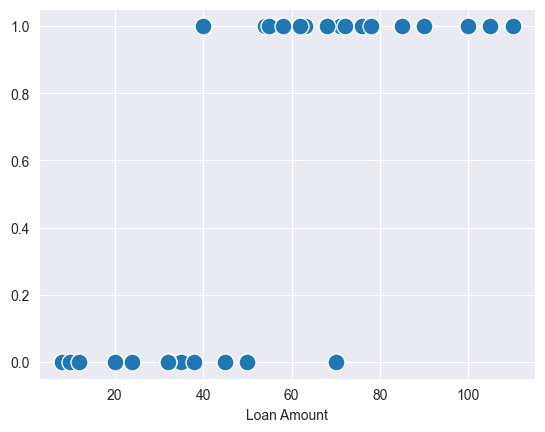

In [12]:
ax = sns.scatterplot(x=loan['Loan Amount'],
                     y=np.where(loan['Default'] == 'No', 0, 1),
                     s=150)

Looking at these two charts, we can easily imagine a sigmoid curve that fits the data. This tells us that a logistic regression function would model the relationship between the predictors (`Income` and `Loan Amount`) and the response (`Default`) well.

## 3. Prepare the Data

Our primary objective in this step is to split our data into training and test sets. The training set will be used to train the model, while the test set will be used to evaluate the model.

Before we split the data, we first need to separate the dependent variable from the independent variables.

Let's start by creating a pandas Series called `y` for the dependent variable.

In [13]:
y = loan['Default']

Then we create a pandas DataFrame called `X` for the independent variables.

In [14]:
x = loan[['Income', 'Loan Amount']]

Next, we import the `train_test_split()` function from the `sklearn.model_selection` subpackage. 

In [15]:
from sklearn.model_selection import train_test_split

Using the `train_test_split()` function, we can split `X` and `y` into `X_train`, `X_test`, `y_train` and `y_test`.

Note that within the `train_test_split()` function, we will set:

* `train_size` to `0.7`. This means we want $70\%$ of the original data to be assigned to the training data while $30\%$ is assigned to the test data. 

* `stratify` as `y`, which means that we want the data split using a stratified random sampling approach based on the values of `y`. 

* `random_state` to `123`, so we get the same results every time we do this split. 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, stratify=y, random_state=123)

After the data is split, the newly created `X_train` and `X_test` data sets hold the independent variables for the training and test sets, respectively. While the `y_train` and `y_test` data sets hold the dependent variable for the training and test sets respectively.


We can refer to the `shape` attribute of any of the newly created data sets to know how many instances or records are in each. Let's look at the training data.

In [21]:
X_train.shape

(21, 2)

The result is a tuple that holds the number of rows and columns in the `X_train` dataframe. It tells us that $21$ out of the $30$ instances in the `loans` data were assigned to the training set.

Let's look at the test set as well.

In [22]:
X_test.shape

(9, 2)

The result tells us that $9$ out of the $30$ instances in the `loans` data were assigned to the test set.